## 1. The NumPy ndarray

Performance difference between NumPy array and built-in sequence. NumPy array is much faster and use significantly less memory.

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = range(1000000)

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 17.1 ms, sys: 7.32 ms, total: 24.4 ms
Wall time: 23.3 ms


In [5]:
% time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 2.05 s, sys: 80.3 ms, total: 2.13 s
Wall time: 2.12 s


An ndarray is a generic multidimensional container for homogeneous data; All of the elements must be the same type.

### 1.1 Creating ndarrays

The array function accepts any sequence-like object (including other arrays) and produces a new NumPy array.

In [6]:
data1 = [6, 7.5, 8, 0, 1]

In [7]:
arr1 = np.array(data1)

In [8]:
type(arr1)

numpy.ndarray

In [9]:
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

Nested sequences will be converted into a multidimensional array:

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [11]:
arr2 = np.array(data2)

In [12]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim  # ndim attribute, indicating the dimension of the array

2

In [14]:
arr2.shape

(2, 4)

In [15]:
np.array(0)

array(0)

The zeros and ones create array of 0s or 1s, respectively, with a given length or shape. The empty creates an array without initializing its value to any particular value.

In [16]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [17]:
np.ones((3, 6))

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [18]:
np.empty((2, 2, 2))

array([[[  1.28822975e-231,  -1.29074456e-231],
        [  6.94984560e-310,   6.94984561e-310]],

       [[  6.94984561e-310,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]]])

arrange is an array_valued version of the built-in Python range function

In [19]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

See also ones_like, zeros_like, full, full_like, identity

### 1.2 Data Types for ndarrays

<img src="img/4_1_1.png">

In [20]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [21]:
arr1.dtype

dtype('float64')

Convert or cast an array from one dtype to another using astype method

In [22]:
arr = np.array([1, 2, 3, 4])

In [23]:
arr.dtype

dtype('int64')

In [24]:
arr.astype('f8')

array([ 1.,  2.,  3.,  4.])

In [25]:
arr.dtype

dtype('int64')

In [26]:
numeric_strings = np.array(['1', '2', '3'], dtype='S')

In [27]:
numeric_strings.astype(float)  # NumPy aliases the Python types to its own equivalent data dtypes

array([ 1.,  2.,  3.])

Use other array's dtype attribute

In [28]:
int_array = np.arange(10)

In [29]:
calibers = np.array([.22, .270], dtype=np.float64)

In [30]:
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

Calling astype always creates a new array.

### 1.3 Arithmetic with NumPy Arrays - Vectorization

Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [31]:
arr = np.random.randn(2, 3)

In [32]:
arr

array([[-1.45357062, -1.30931131,  1.58010612],
       [-0.66992369, -0.50206272, -1.53647667]])

In [33]:
arr * arr

array([[ 2.11286755,  1.7142961 ,  2.49673537],
       [ 0.44879775,  0.25206698,  2.36076056]])

In [34]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [35]:
1 / arr

array([[-0.68796107, -0.7637603 ,  0.63286888],
       [-1.49270733, -1.99178301, -0.65083969]])

In [36]:
arr ** 2

array([[ 2.11286755,  1.7142961 ,  2.49673537],
       [ 0.44879775,  0.25206698,  2.36076056]])

In [37]:
arr2 = np.zeros((2, 3))

In [38]:
arr > arr2

array([[False, False,  True],
       [False, False, False]], dtype=bool)

Operations between differently sized array is called **_broadcasting_**

### 1.4 Basic Indexing and Slicing

One-dimensional arrays slicing:

In [39]:
arr = np.arange(10)

In [40]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
arr[5:8]

array([5, 6, 7])

Able to assign a scalar value to a slice

In [42]:
arr[5:8] = 12

In [43]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Array slices are **views** on the original array. The data is not copies, and any modifications to the biew will be reflected in the source array, which distinguishs from Python's bulit-in lists.

In [44]:
arr_slice = arr[5:8]

In [45]:
arr_slice

array([12, 12, 12])

In [46]:
arr_slice[1] = 123

In [47]:
arr

array([  0,   1,   2,   3,   4,  12, 123,  12,   8,   9])

Copy an array

In [48]:
arr_copy = arr[5:8].copy()

Higher dimensional arrays

In [49]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [50]:
arr2d[0][2]

3

In [51]:
arr2d[0, 2]

3

Slicing multidimensions array will compress the array

In [52]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [53]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2*3 array

In [54]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d[0]:

In [55]:
old_values = arr3d[0].copy()

In [56]:
arr3d[0] = 42

In [57]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [58]:
arr3d[0] = np.array([1,2,3])

In [59]:
arr3d[0] = old_values

In [60]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Indexing with slices

In [61]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

### 1.5 Boolean Indexing

In [62]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [63]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='|S4')

In [64]:
data = np.random.randn(7, 4)

In [65]:
data

array([[-0.13347556,  1.72092604, -0.47081015,  0.51483002],
       [ 0.44930149,  0.71200203,  0.11032496, -1.30271747],
       [-0.8569108 ,  0.43095421,  1.55883927, -0.63708095],
       [-0.03716643,  0.10211302, -1.61334269, -0.00977256],
       [ 1.20612003,  0.16390966, -0.59023814, -1.21844567],
       [ 0.43159346, -0.53956842,  0.11973774,  0.84250208],
       [ 0.61889941, -0.37354647,  0.19289646, -1.59098061]])

In [66]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [67]:
data[names == 'Bob']

array([[-0.13347556,  1.72092604, -0.47081015,  0.51483002],
       [-0.03716643,  0.10211302, -1.61334269, -0.00977256]])

In [68]:
data[names == 'Bob', 2:]

array([[-0.47081015,  0.51483002],
       [-1.61334269, -0.00977256]])

In [69]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

The ~ operator can be used to invert a general condition

In [70]:
data[~(names == 'Bob')]

array([[ 0.44930149,  0.71200203,  0.11032496, -1.30271747],
       [-0.8569108 ,  0.43095421,  1.55883927, -0.63708095],
       [ 1.20612003,  0.16390966, -0.59023814, -1.21844567],
       [ 0.43159346, -0.53956842,  0.11973774,  0.84250208],
       [ 0.61889941, -0.37354647,  0.19289646, -1.59098061]])

The Python keywords _and_ and _or_ do not work with boolean arrays. Use & and | instead.

In [71]:
mask = (names == 'Bob') | (names == 'Will')

In [72]:
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [73]:
data[mask]

array([[-0.13347556,  1.72092604, -0.47081015,  0.51483002],
       [-0.8569108 ,  0.43095421,  1.55883927, -0.63708095],
       [-0.03716643,  0.10211302, -1.61334269, -0.00977256],
       [ 1.20612003,  0.16390966, -0.59023814, -1.21844567]])

Selecting data from an array by boolean indexing always creates a ___copy___ of the data

### 1.6 Fancy Indexing

Fancy indexing is indexing using integer arrays.

In [74]:
arr = np.empty((8, 4))

In [75]:
for i in range(8):
    arr[i] = i

In [76]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

To select out a subset of rows in a particular order:

In [77]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [78]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

Passing multiple index arrays select a one-dimensional array of elements corresponding to each tuple of indices:

In [79]:
arr = np.arange(32).reshape((8, 4))

In [80]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

The elements (1, 0), (5, 3), (7, 1), (2, 2) were selected. The code below selected the rectangular region formed by a subset of the matrix's row and columns

In [81]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Fancy indexing always creates a ___copy___

### 1.7 Transposing Arrays and Swapping Axes

To transpose an array, you can use the ___transpose___ method or ___T___ attribute

In [82]:
arr = np.arange(15).reshape((3, 5))

In [83]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [84]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Computing the inner matrix product

In [85]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

___transpose___ method will accept a tuple of axis numbers to permutate the axes

In [86]:
arr = np.arange(24).reshape((2, 3, 4))

In [87]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [88]:
arr.transpose((0, 2, 1))

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

Here, the axes have been reordered with the third axis second, the second axis third and the first axis unchanged

In [89]:
arr.T

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

___swapaxes___ takes a pair of axis numbers and switch the indicated axes to rearrange the data.

In [90]:
arr.swapaxes(1,2)

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

## 2. Universal Functions

A universal function, or ___ufunc___, is a function that performs element-wise operations on data in ndarrays. Can be thought as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

___unary___ ufuncs:

In [91]:
arr = np.arange(10)

In [92]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [93]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

___binary___ ufuncs, takes two arrays and return a single array:

In [94]:
x = np.random.randn(8)

In [95]:
y = np.random.randn(8)

In [96]:
x

array([ 0.21119865,  1.47126046,  0.2653566 , -0.98150106, -0.9872568 ,
        1.45632142, -0.70275296,  0.5598267 ])

In [97]:
y

array([ 0.24612258, -0.81423787,  1.86678776, -1.48908096,  1.07573833,
       -0.0163802 ,  0.21256073,  0.41887534])

In [98]:
np.maximum(x, y)

array([ 0.24612258,  1.47126046,  1.86678776, -0.98150106,  1.07573833,
        1.45632142,  0.21256073,  0.5598267 ])

A ufunc can return multiple arrays. ___modf___ is a vectorized version of the built-in Python ___divmod___. It returns the fractional and integral parts of a floating-point array

In [99]:
arr = np.random.randn(7) * 5

In [100]:
arr

array([ 2.8918243 ,  5.41664986,  9.03544337,  0.87882952, -2.59618567,
       -4.05817977, -4.42008197])

In [101]:
remainder, whole_part = np.modf(arr)

In [102]:
remainder

array([ 0.8918243 ,  0.41664986,  0.03544337,  0.87882952, -0.59618567,
       -0.05817977, -0.42008197])

In [103]:
whole_part

array([ 2.,  5.,  9.,  0., -2., -4., -4.])

Ufuncs accept an optional ___out___ argument that allows them to operate in-place on arrays (assign to a variable directly)

In [104]:
arr

array([ 2.8918243 ,  5.41664986,  9.03544337,  0.87882952, -2.59618567,
       -4.05817977, -4.42008197])

In [105]:
np.sqrt(arr)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([ 1.70053647,  2.32736973,  3.00590142,  0.93745908,         nan,
               nan,         nan])

In [106]:
np.sqrt(arr, arr)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([ 1.70053647,  2.32736973,  3.00590142,  0.93745908,         nan,
               nan,         nan])

In [107]:
arr

array([ 1.70053647,  2.32736973,  3.00590142,  0.93745908,         nan,
               nan,         nan])

<img src="img/4_2_1.png">

<img src="img/4_2_2.png">

## 3. Array Oriented Programming with Arrays

In [108]:
points = np.arange(-5, 5, 0.01)

In [109]:
# np.meshgrid takes two 1D arrays and produces two
# 2D matrics corresponding to all pairs of (x, y) in the two arrays:
xs, ys = np.meshgrid(points, points)

In [110]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [111]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [114]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [115]:
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

In [116]:
import matplotlib.pyplot as plt

In [140]:
%matplotlib inline

In [142]:
plt.rcParams["figure.figsize"] = 10, 10

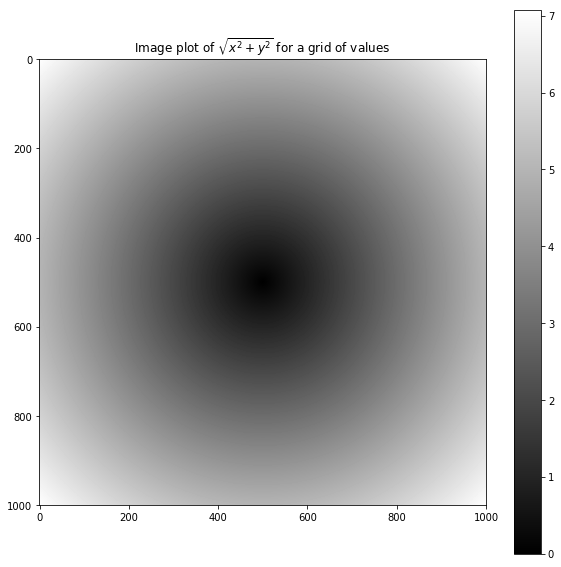

In [143]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar(); plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 3.1 Expressing Conditional Logic as Array Operations

The ___numpy.where___ function is a vectorized version of the ternary expression ___x if condition else y___.

In [152]:
xarr = np.full(shape=5, fill_value=1.1)

In [153]:
yarr = np.full(shape=5, fill_value=2.2)

In [154]:
cond = np.array([True, False, True, True, False])

Take a value from xarr whenever the corresponding value in ___cond___ is True, otherwise from yarr

In [155]:
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]

In [156]:
result

[1.1000000000000001,
 2.2000000000000002,
 1.1000000000000001,
 1.1000000000000001,
 2.2000000000000002]

In [157]:
result = np.where(cond, xarr, yarr) # The second and third arguments can be scalars

In [158]:
result

array([ 1.1,  2.2,  1.1,  1.1,  2.2])

In [159]:
arr = np.random.randn(4, 4)

In [160]:
arr

array([[-0.40075067,  0.91484354,  0.24847676,  0.69918573],
       [ 1.52401705,  0.36124012, -0.08761334,  0.87704566],
       [ 0.3601692 ,  1.40141558,  0.70998103, -0.57590776],
       [-0.30252163, -0.7145901 ,  0.33951551,  0.887737  ]])

In [161]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [ 2,  2, -2,  2],
       [ 2,  2,  2, -2],
       [-2, -2,  2,  2]])

In [162]:
np.where(arr > 0, 2, arr)

array([[-0.40075067,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -0.08761334,  2.        ],
       [ 2.        ,  2.        ,  2.        , -0.57590776],
       [-0.30252163, -0.7145901 ,  2.        ,  2.        ]])

### 3.2 Mathematical and Statistical Methods

Aggregations (often called reductions) like sum, mean, and std can be used either by calling the array instance method or using the to-level NumPy function.

In [165]:
arr = np.random.randn(5, 4)

In [166]:
arr.mean()

0.065917611512690641

In [167]:
np.mean(arr)

0.065917611512690641

In [168]:
arr.sum()

1.3183522302538129

Functions like mean and sum take an optional axis argument that computes the statitic over the given axis. Resulting in reduction of the number of dimension

In [169]:
arr.mean(axis=0)

array([ 0.31203911,  0.31491919,  0.39348387, -0.75677171])

In [171]:
arr.sum(axis=1)

array([ 0.3204832 , -0.62674269,  0.55281918, -0.21315256,  1.2849451 ])

In [172]:
arr.sum(axis=(0,1))

1.3183522302538129

Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

In [173]:
arr = np.arange(8)

In [174]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice

In [175]:
arr = np.arange(9).reshape(3 , 3)

In [176]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [177]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [178]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

In [179]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

<img src='img/4_3_1.png'>

### 3.3 Methods for Boolean Arrays

sum is used as a means of counting True values in a boolean array

In [184]:
arr = np.random.randn(100)

In [185]:
(arr > 0).sum()

54

___any___ tests whether one or more values in an array is True, while ___all___ checks if every value is True

In [187]:
bools = np.array([False, True, True, False])

In [188]:
bools.any()

True

In [189]:
bools.all()

False

These methods also work with non-boolean arrays, where non-zero elements evaluate to Ture.

### 3.3 Sorting

In [190]:
arr = np.random.randn(6)

In [191]:
arr

array([ 0.6505094 ,  0.98762051, -0.48893474,  1.64290714, -0.36627567,
        0.73138147])

In [192]:
arr.sort()

In [193]:
arr

array([-0.48893474, -0.36627567,  0.6505094 ,  0.73138147,  0.98762051,
        1.64290714])

You can sort each one-dimensional section of values in a multidimensional array in-place along an axis by passing the axis number to sort

In [194]:
arr = np.random.randn(5, 3)

In [195]:
arr

array([[ 1.30763968, -0.08465787,  0.24585823],
       [ 0.07474187, -0.49860339,  0.47907228],
       [-0.39311782,  0.96682976, -0.87538277],
       [-0.20335066,  1.30693245, -0.222904  ],
       [ 0.14942795, -0.07881278, -0.58223476]])

In [198]:
arr.sort(0)

In [199]:
arr

array([[-0.87538277, -0.39311782,  0.14942795],
       [-0.58223476, -0.20335066,  0.47907228],
       [-0.49860339, -0.07881278,  0.96682976],
       [-0.222904  ,  0.07474187,  1.30693245],
       [-0.08465787,  0.24585823,  1.30763968]])

np.sort returns a sorted copy of an array instead of modifying the array in-place

A quick-and-dirty way to compute the quantiles of an array:

In [200]:
large_arr = np.random.randn(1000)

In [201]:
np.sort(large_arr)[int(0.05 * len(large_arr))] # 5% quantile

-1.7315553922258098

### 3.4 Unique and Other Set Logic

<img src='img/4_3_2.png'>

## 4. File Input and Output with Arrays

___np.save___ and ___np.load___ can efficiently save and load array data on disk in binary format.

Arrays are saved by default in an uncompressed raw binary format with file extension .npy

In [202]:
arr = np.arange(10)

In [203]:
np.save('some_array', arr)

In [204]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Use ___np.savez___ with arrays as keyword arguments to save multiple arrays. When loading, a dict-like object returns

In [205]:
np.savez('array_archive.npz', a=arr, b=arr)

In [206]:
arch = np.load('array_archive.npz')

In [207]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

***numpy.savez_compressed*** can compress data

## 5. Linear Algebra

Matrix multiplication

In [208]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [209]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [210]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [211]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [212]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [213]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [214]:
np.dot(x, np.ones(3))

array([  6.,  15.])

___numpy.linalg___ has a standard set of matrix decompositions and things like inverse and determinant

In [215]:
from numpy.linalg import inv, qr

In [218]:
X = np.random.randn(5, 5)

In [222]:
X

array([[-0.78924104,  0.73084517,  0.14255862,  0.66725505,  0.65753827],
       [-0.74964086, -1.29529392,  1.3614047 ,  0.13839484, -0.41659723],
       [ 1.45420193,  0.18361218,  0.97782236,  1.3305556 , -0.52734755],
       [-0.18303535,  0.1300639 ,  0.08836321,  1.18655865, -0.21526302],
       [-0.06572773, -0.72139255,  2.25966155,  0.09054414, -1.58686364]])

In [223]:
inv(X)

array([[-0.21472102,  0.02217604,  0.51710809, -0.44597156, -0.20614264],
       [ 0.53485312, -0.76135849, -0.09818959, -0.13794685,  0.47284538],
       [ 0.56973156,  0.19878211,  0.3282694 , -0.72488918,  0.17313271],
       [-0.02980203,  0.18799678,  0.15672264,  0.67755976, -0.20569869],
       [ 0.57533373,  0.63898563,  0.49961001, -0.91238376, -0.60179168]])

In [225]:
np.dot(X, inv(X))

array([[  1.00000000e+00,   5.55111512e-17,  -5.55111512e-17,
          4.44089210e-16,  -2.77555756e-17],
       [  2.77555756e-17,   1.00000000e+00,  -2.77555756e-17,
          5.55111512e-17,  -1.66533454e-16],
       [ -5.55111512e-17,   0.00000000e+00,   1.00000000e+00,
         -5.55111512e-17,  -2.77555756e-17],
       [ -1.52655666e-16,  -5.55111512e-17,  -8.32667268e-17,
          1.00000000e+00,   5.55111512e-17],
       [ -1.11022302e-16,   0.00000000e+00,   0.00000000e+00,
         -2.22044605e-16,   1.00000000e+00]])

In [227]:
q, r = qr(X)

In [228]:
r

array([[ 1.82685198,  0.37485831,  0.06797346,  0.59194264, -0.45423823],
       [ 0.        ,  1.62555821, -1.92166689,  0.25826225,  1.35976412],
       [ 0.        ,  0.        , -2.06066412, -1.1404509 ,  0.94628626],
       [ 0.        ,  0.        ,  0.        , -1.39038002, -0.1993861 ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.67673947]])

In [229]:
?qr

<img src='img/4_5_1.png'>

## 6. Pseudorandom Number Generation

random.normal takes more parameters than random.randn

In [6]:
samples = np.random.normal(loc=1.0, scale=2.0, size=(4, 4))

In [7]:
samples

array([[ 0.6329838 ,  5.32505141, -0.58543095,  1.80883919],
       [ 1.82932428,  1.9271194 ,  5.09639766,  0.25457426],
       [ 2.71258885,  1.54044274,  3.19851373,  6.63959293],
       [ 1.63388682,  2.54873608,  0.94788322,  6.12823835]])

numpy.random is over an order of magnitude faster than Python's built-in random module

In [8]:
from random import normalvariate

In [9]:
N = 1000000

In [10]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 3: 2.24 s per loop


In [11]:
%timeit np.random.normal(size=N)

10 loops, best of 3: 42.5 ms per loop


___np.random.seed___ can change NumPy's random number generation seed

In [23]:
np.random.seed(1)

In [24]:
np.random.randn(5)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])

In [25]:
np.random.seed(1)

In [26]:
np.random.randn(5)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])

Can only influence the following random command

In [27]:
np.random.randn(5)

array([-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038])

The data generation functions in numpy.random use a global random seed. To avoid global state, you can use ___numpy.random.RandomState___ to create a isolated random number generator.

In [29]:
rng = np.random.RandomState(1)

In [30]:
rng.randn(5)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])

<img src="img/4_6_1.png">

## 7 Example: Random Walks

Starting at the position 0 with steps of 1 and -1 occuring with equal probability

Pure Python way

In [31]:
import random

In [57]:
import matplotlib.pyplot as plt

In [71]:
path = [0]

In [72]:
steps = 1000

In [73]:
for i in range(steps):
    step = random.choice((-1, 1))
    path.append(path[-1] + step)

In [67]:
%matplotlib inline

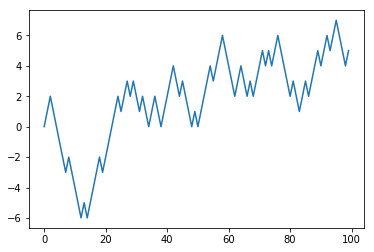

In [74]:
plt.plot(path[:100])

___NumPy Way___

In [80]:
steps = np.random.choice((-1, 1), size=1000)

In [81]:
path = steps.cumsum()

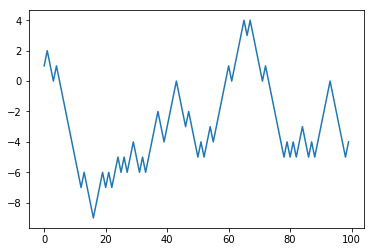

In [83]:
plt.plot(path[:100])

Minimum and maximum value along the path trajectory

In [84]:
path.min()

-10

In [85]:
path.max()

28

___Fisrt crossing time___, the step at which the random walk reaches a particular value

___argmax___ returns the first index of the maximum value along the axis. True is maximum value in a boolean array

In [87]:
(np.abs(path) > 10).argmax()

232

In [88]:
?path.argmax

### 7.1 Simulating Many Random Walks at Once

Generate a 2D array of all steps with n rows (# of walk) and m columns (# of steps of each walk)

In [90]:
nwalks = 5000

In [91]:
msteps = 1000

In [92]:
steps = np.random.choice((-1, 1), size=(nwalks, msteps))

In [93]:
walks = steps.cumsum(axis=1)

In [94]:
walks

array([[  1,   2,   1, ..., -48, -49, -48],
       [ -1,  -2,  -3, ...,  44,  43,  42],
       [  1,   2,   3, ..., -12, -13, -12],
       ..., 
       [ -1,  -2,  -3, ..., -32, -31, -32],
       [  1,   0,   1, ...,  28,  27,  26],
       [ -1,  -2,  -3, ...,   2,   1,   2]])

Compute minimum and maximum value of every walks

In [100]:
walks.min(1)

array([-51, -17, -14, ..., -47,  -8,  -9])

In [103]:
walks.min()

-108

Compute the minimum crossing time to 30 or -30.

Select the walks reach 30

In [117]:
reach30 = (np.abs(walks) > 30).any(1)

Number that reaches 30 or -30

In [118]:
reach30.sum()

3268

In [119]:
(np.abs(walks[reach30]) > 30).argmax(1)

array([678, 642, 472, ..., 556, 422, 318])